## Final Project: Phase 2 - Data Transformations
Spring 2024  
Group: Michael Massone and Joseph Nelson Farrell   
DS 5230 Unsupervised Machine Learning  
Professor Steven Morin, PhD  
Due: 03/11/2024  
___

### Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import sys
from pathlib import Path
from sklearn.preprocessing import LabelEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

import warnings

___

### Define File Paths

In [24]:
# define path
nb_path = Path(os.getcwd())
print(nb_path)
path = str(nb_path.parent)
print(path)

# path to figs folder
figs_path = path + '/figs'

# path to data
data_path= path + '/data'

# path to src folder
src_path = path + '/src'
print(src_path)

# sys path
sys.path.append(src_path)

/Users/nelsonfarrell/Documents/Northeastern/5230/final_project/DS5230-final/notebooks
/Users/nelsonfarrell/Documents/Northeastern/5230/final_project/DS5230-final
/Users/nelsonfarrell/Documents/Northeastern/5230/final_project/DS5230-final/src


___

### Functions

In [25]:
from preprocessing_eda_utils import missingness_cols
from preprocessing_eda_utils import column_dtypes
from preprocessing_eda_utils import compute_vif

___

### Parameters

In [26]:
# design matrix csv file name
design_matrix_file_name = "/curated/beans_design.csv"

# missingness threshold for determining columns to drop
missingness_threshold = 0.20

# min frequency for nomical transformer; OneHotEncoder
min_frequency = 20

___

### Load Data

In [27]:
# read in design matrix
design_df = pd.read_csv( data_path + design_matrix_file_name)

___

## Attribute Exploration

___

### Identify Columns with Missing Value Count Above Threshold

In [28]:
# check columns for missingness
missingness_drop_list = missingness_cols(design_df, missingness_threshold)

# display results
if missingness_drop_list == []:
    print(f'There are no columns that require dropping based on missingness')
else:
    print(f'The following columns have a missingness proportion greater than {missingness_threshold}.')
    print(f'These columns should be dropped:')
    for i in range(len(missingness_drop_list)):
        print(f'\t{i + 1}. {missingness_drop_list[i]}')

There are no columns that require dropping based on missingness


___

### Visually Inspect Design Matrix:

In [29]:
design_df.head(10)

,Unnamed: 0,id,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0,0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,1,1,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,2,2,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,3,3,30008.0,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,4,4,30140.0,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
5,5,5,30279.0,634.927,212.560556,181.510182,1.171067,0.520401,30600.0,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236
6,6,6,30477.0,670.033,211.050155,184.039050,1.146768,0.489478,30970.0,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049
7,7,7,30519.0,629.727,212.996755,182.737204,1.165591,0.513760,30847.0,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345
8,8,8,30685.0,635.681,213.534145,183.157146,1.165852,0.514081,31044.0,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953
9,9,9,30834.0,631.934,217.227813,180.897469,1.200834,0.553642,31120.0,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061


___

### Identify Feature Types: Nominal & Numerical

In [30]:
# get nominal and numerical columns, print column dtype
nominal_cols, numerical_cols, unique_value_cols = column_dtypes(design_df)

# display nominal cols
if nominal_cols == []:
    print(f'There no nominal columns in the dataset.\n')
else:
    print(f'The nominal columns are:')
    for i in range(len(nominal_cols)):
        print(f'{i + 1}: {nominal_cols[i]}')

# display numerical cols
if numerical_cols == []:
    print(f'There no numerical columns in the dataset.')
else:
    print(f'The {len(numerical_cols)} numerical columns are:')
    for i in range(len(numerical_cols)):
        print(f'\t{i + 1}: {numerical_cols[i]}')

# display unique values information
if unique_value_cols == []:
    print(f'\nThere no columns with all unique values in the dataset.')
else:
    print(f'\nThe {len(unique_value_cols)} columns with all unique values are:')
    for i in range(len(unique_value_cols)):
        print(f'\t{i + 1}: {unique_value_cols[i]}')

Column: Unnamed: 0
Data Type: int64
Unique value count: 13611, DF length: 13611, Ratio: 1.0
***
FLAG column Unnamed: 0 for review 
***
__________________________________________________________

Column: id
Data Type: int64
Unique value count: 13611, DF length: 13611, Ratio: 1.0
***
FLAG column id for review 
***
__________________________________________________________

Column: Area
Data Type: float64
Unique value count: 12011, DF length: 13611, Ratio: 0.88
__________________________________________________________

Column: Perimeter
Data Type: float64
Unique value count: 13413, DF length: 13611, Ratio: 0.99
__________________________________________________________

Column: MajorAxisLength
Data Type: float64
Unique value count: 13543, DF length: 13611, Ratio: 1.0
__________________________________________________________

Column: MinorAxisLength
Data Type: float64
Unique value count: 13543, DF length: 13611, Ratio: 1.0
__________________________________________________________

Colum

___

### Create Non Machine Learning Attributes List

In [31]:
# display columns
design_df.columns

Index(['Unnamed: 0', 'id', 'Area', 'Perimeter', 'MajorAxisLength',
       'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea',
       'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness',
       'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [32]:
# attributes not to be used for machine learning
non_ml_attr_list = ['id']
for col in non_ml_attr_list:
    if col in nominal_cols:
        nominal_cols.remove(col)
    if col in numerical_cols:
        numerical_cols.remove(col)

# instaniate ml_ignore_list
ml_ignore_list = [missingness_drop_list + non_ml_attr_list]

# add any attributes that should be dropped from dataframe
drop_list = ['Unnamed: 0'] # 'Unnamed: 0' is a secondary id column and can be dropped. 

# drop cols in drop_list from design matrix
cols1 = design_df.columns
design_df.drop(drop_list, axis = 1, inplace = True)
assert(len(design_df.columns) != len(cols1))

# drop col names in drop_list from nominal and numerical lists
for col in drop_list:
    if col in nominal_cols:
        nominal_cols.remove(col)
    if col in numerical_cols:
        numerical_cols.remove(col)
assert(design_df.shape[1] == len(non_ml_attr_list) + len(numerical_cols) + len(nominal_cols))

# display finalized ML attributes information
print(f'Training X Dimensions: \n \t{design_df[numerical_cols + nominal_cols].shape}')

print('Non Machine Learning Attributes:')
for i, element in enumerate(non_ml_attr_list):
    print(f'\t {i+1}: {element}')

print('Attributes Ignored in Machine Learning:')
for i, element in enumerate(ml_ignore_list):
    print(f'\t {i+1}: {element}')

print('Numerical Columns:')
if numerical_cols == []:
    print(f'\t None')
else:
    for i, element in enumerate(numerical_cols):
        print(f'\t {i+1}: {element}')

print('Nominal Columns:')
if nominal_cols == []:
    print(f'\t None')
else:
    for i, element in enumerate(nominal_cols):
        print(f'\t {i+1}: {element}')



Training X Dimensions: 
 	(13611, 16)
Non Machine Learning Attributes:
	 1: id
Attributes Ignored in Machine Learning:
	 1: ['id']
Numerical Columns:
	 1: Area
	 2: Perimeter
	 3: MajorAxisLength
	 4: MinorAxisLength
	 5: AspectRation
	 6: Eccentricity
	 7: ConvexArea
	 8: EquivDiameter
	 9: Extent
	 10: Solidity
	 11: roundness
	 12: Compactness
	 13: ShapeFactor1
	 14: ShapeFactor2
	 15: ShapeFactor3
	 16: ShapeFactor4
Nominal Columns:
	 None


#### Feature Destriptions<br> 
* ```Area``` (A) - ***float64 - Ratio*** - The area of a bean zone and the number of pixels within its boundaries.<br><br>
* ```Perimeter``` (P) - ***float64 - Ratio*** - Bean circumference is defined as the length of its border.<br><br>
* ```MajorAxisLength```(L) - ***float64 - Ratio*** - The distance between the ends of the longest line that can be drawn from a bean.<br><br>
* ```MinorAxisLength``` (l) - ***float64 - Ratio*** - The longest line that can be drawn from the bean while standing perpendicular to the main axis.<br><br>
* ```AspectRatio``` (K) - ***float64 - Ratio*** - Defines the relationship between L and l.<br><br>
* ```Eccentricity``` (Ec) - ***float64 - Ratio*** - Eccentricity of the ellipse having the same moments as the region.<br><br>
*  ```ConvexArea``` (C) - ***float64 - Ratio*** - Number of pixels in the smallest convex polygon that can contain the area of a bean seed.<br><br>
* ```EquivDiameter``` (Ed) - ***float64 -*** Ratio - The diameter of a circle having the same area as a bean seed area.<br><br>
* ```Extent``` (Ex) - ***float64 - Ratio -*** The ratio of the pixels in the bounding box to the bean area.<br><br>
* ```Solidity``` (S) - ***float64 - Ratio -*** Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.<br><br>
* ```Roundness``` (R) - ***float64 - Ratio -*** Calculated with the following formula: $\dfrac{(4 \pi A)}{(P^2)}$ <br><br>
* ```Compactness``` (CO) - ***float64 - Ratio*** - Measures the roundness of an object: $\dfrac{Ed}{L}$ <br><br>
* ```ShapeFactor1``` (SF1) - ***float64 - Ratio*** - $\dfrac{L}{A}$ <br><br>
* ```ShapeFactor2``` (SF2) - ***float64 - Ratio*** - $\dfrac{l}{A}$ <br><br>
* ```ShapeFactor3``` (SF3) - ***float64 - Ratio*** - $\dfrac{A}{\frac{L}{2}\cdot \frac{L}{2} \cdot \pi }$ <br><br>
* ```ShapeFactor4``` (SF4) - ***float64 - Ratio***  $\dfrac{A}{\frac{L}{2}\cdot \frac{l}{2} \cdot \pi }$ <br><br>

___

### Display Missingness of Machine Learning Attributes:

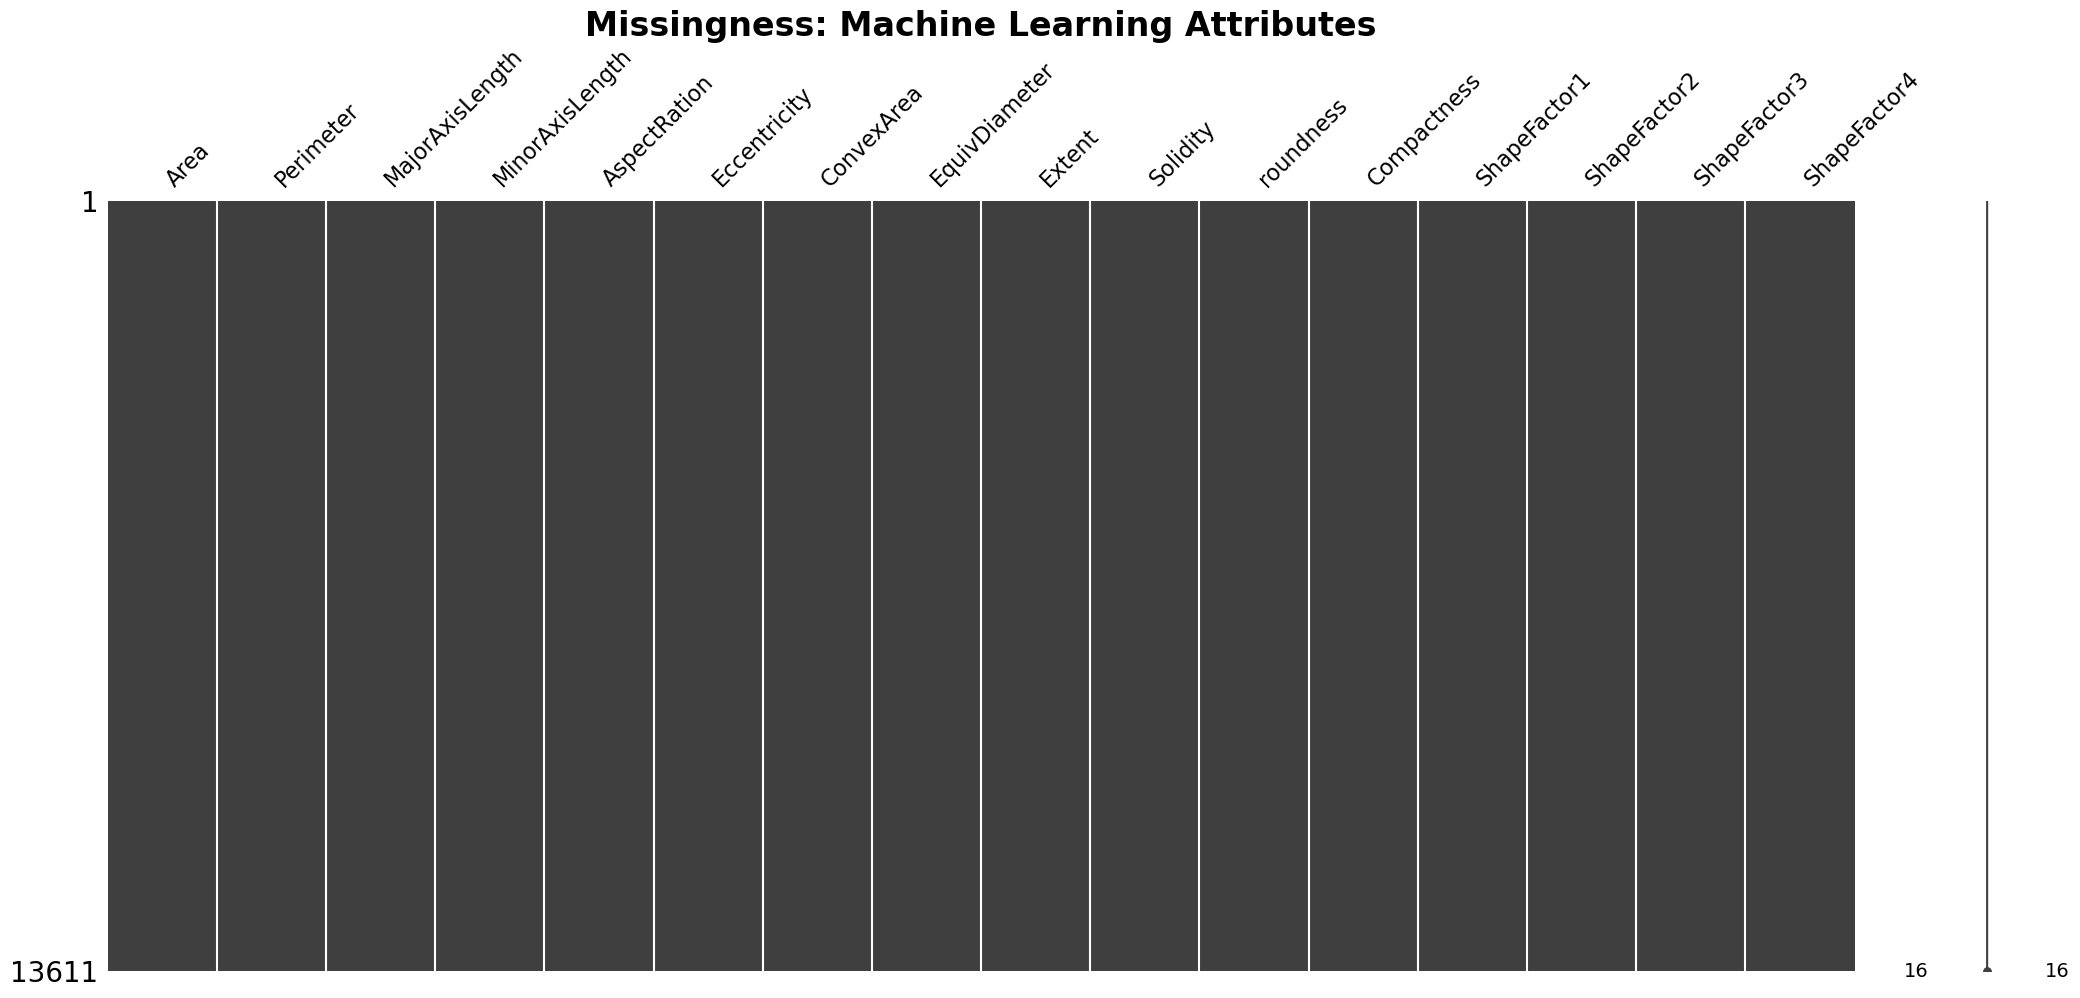

In [33]:
# display missingness plot; ml attributes
msno.matrix(design_df[numerical_cols + nominal_cols])
plt.title("Missingness: Machine Learning Attributes", weight = 'bold', fontsize = 24)

# save fig
plt.savefig(figs_path + "/missing_attributes_ml_attributes.png", bbox_inches = 'tight')

In [34]:
print('Machine Learning Attributes Datatypes:')
design_df[numerical_cols + nominal_cols].dtypes

Machine Learning Attributes Datatypes:


Area               float64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea         float64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
dtype: object

___

### Explore Correlation and VIF of Numerical Attributes:

/Users/nelsonfarrell/miniconda3/envs/usml_base_ds_2/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


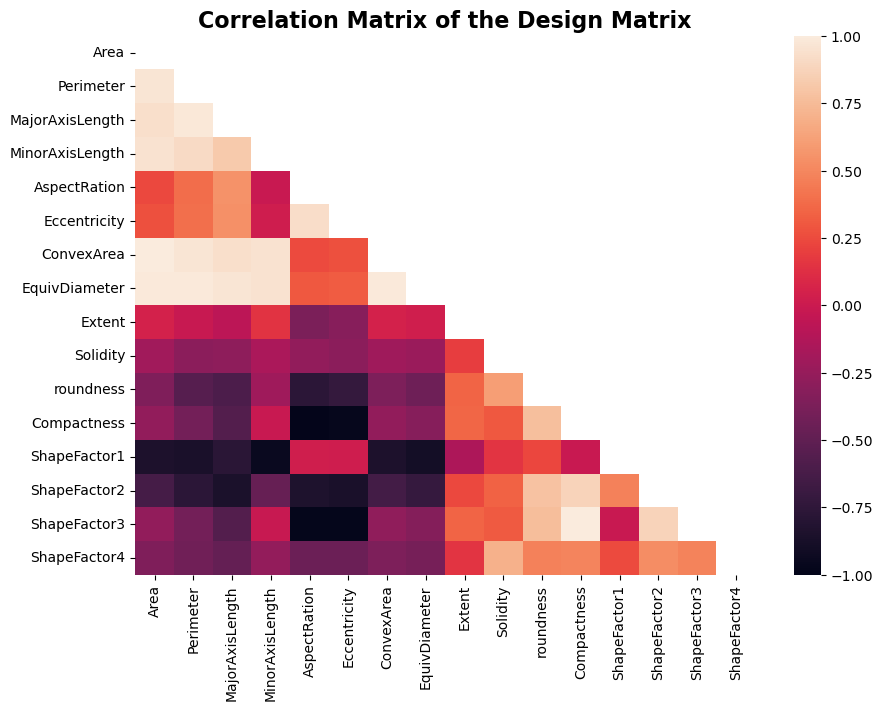

In [35]:
# set figure size
plt.figure(figsize = (10, 7))

# generate a mask to only show the bottom triangle
mask = np.triu(np.ones_like(design_df[numerical_cols].corr(), dtype=bool))

# generate heatmap
sns.heatmap(design_df[numerical_cols].corr(), annot = True, fmt = ".2f", mask = mask, vmin = -1, vmax = 1)
plt.title('Correlation Matrix of the Design Matrix', weight = 'bold', fontsize = 16)

# save fig
plt.savefig(figs_path + "/correlation_matrix.png", bbox_inches = 'tight')

#### VIF Factor: All Numerical Attributes 

In [36]:
vif = compute_vif(design_df, numerical_cols)

Variance Inflation Factors Above Threshold(5):

           Variable            VIF
0              Area   81390.772240
1         Perimeter    3573.980197
2   MajorAxisLength   87936.513102
3   MinorAxisLength   77482.673330
4      AspectRation   13918.856718
5      Eccentricity    1183.004420
6        ConvexArea   78552.516774
7     EquivDiameter  314929.768895
9          Solidity      14.053550
10        roundness     104.028512
11      Compactness  276769.624251
12     ShapeFactor1     607.175671
13     ShapeFactor2    1245.330594
14     ShapeFactor3  200286.806522
15     ShapeFactor4      67.043776


Variance Inflation Factors Below Threshold(5):

  Variable       VIF
8   Extent  1.241536


#### VIF Factor without Shapefactor Attributes

In [37]:
vif = compute_vif(design_df, numerical_cols[:12])

Variance Inflation Factors Above Threshold(5):

           Variable           VIF
0              Area  55455.469502
1         Perimeter   3369.110823
2   MajorAxisLength   8280.492793
3   MinorAxisLength   5661.863735
4      AspectRation    430.562583
5      Eccentricity    176.949307
6        ConvexArea  55945.114110
7     EquivDiameter  26144.294906
9          Solidity     10.649496
10        roundness     98.457059
11      Compactness    999.791946


Variance Inflation Factors Below Threshold(5):

  Variable       VIF
8   Extent  1.238184


___

## Build Pipeline

___

### Numerical Transformer: Impute & Scale

In [38]:
# instantiate sklearn pipeline
numerical_transformer = Pipeline(
    steps=[
            ('imputer', SimpleImputer()),
            ('scaler', StandardScaler())
          ]
        )

### Nominal Transformer: Impute & Encode

#### Determine min frequency for nominal transformer:

In [39]:
if len(nominal_cols) > 0:
    print(design_df[nominal_cols].value_count())
    print('Set min_frequency for nominal transformer in perameters cell.')
else:
    min_frequency = None

### Nominal Transformer

In [40]:
# instantiate nominal transformer
nominal_transformer = Pipeline(
    steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot_encoder', OneHotEncoder(sparse_output=False, min_frequency=min_frequency))
    ]
)

### Column Transformer:

In [41]:
preprocessor = ColumnTransformer(
        transformers=[
            ('numerical', numerical_transformer, numerical_cols),
            ('nominal', nominal_transformer, nominal_cols)
        ]
)

### Execute Pipeline with Design Matrix

In [42]:
# execute pipeline
trans_df = pd.DataFrame(
    data = preprocessor.fit_transform(design_df),
    index = design_df.index, # KEEP TRACK OF INDEX
    columns = preprocessor.get_feature_names_out() #NAME COlumns
)

In [43]:
# display transfored dataframe
trans_df

,numerical__Area,numerical__Perimeter,numerical__MajorAxisLength,numerical__MinorAxisLength,numerical__AspectRation,numerical__Eccentricity,numerical__ConvexArea,numerical__EquivDiameter,numerical__Extent,numerical__Solidity,numerical__roundness,numerical__Compactness,numerical__ShapeFactor1,numerical__ShapeFactor2,numerical__ShapeFactor3,numerical__ShapeFactor4
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367613,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100893,2.689702,0.771138
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,-0.373471,-0.446083,-0.366669,-0.363055,-0.123703,0.153343,-0.378191,-0.364148,-0.716284,0.684173,0.727872,0.032433,0.261425,0.055630,-0.006086,0.760813
13607,-0.373334,-0.456336,-0.450053,-0.257015,-0.432979,-0.165141,-0.378662,-0.363962,1.022933,0.774384,0.818807,0.362794,0.110384,0.285117,0.328393,0.722659
13608,-0.372038,-0.447833,-0.450478,-0.246456,-0.448618,-0.182940,-0.376143,-0.362197,-0.403392,0.591370,0.758468,0.370533,0.104269,0.289204,0.336328,0.390251
13609,-0.371765,-0.427029,-0.428974,-0.266742,-0.380735,-0.106960,-0.372851,-0.361825,-0.903414,0.143717,0.581753,0.285098,0.141906,0.228375,0.248973,0.036440


### Save Transformed Data

In [44]:
# save the tranformed data
trans_df.to_csv(data_path + '/curated/trans_data_design.csv', index = False)
print(f"Design dataframe saved at: {data_path}/curated/trans_data_design.csv")

Design dataframe saved at: /Users/nelsonfarrell/Documents/Northeastern/5230/final_project/DS5230-final/data/curated/trans_data_design.csv
